# Data Preprocessing

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
dataframe = pd.read_csv('Social_Network_Ads.csv')

In [114]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [115]:
df = dataframe.iloc[:, 2:]

In [116]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [117]:
df.shape

(400, 3)

# Splitting the dataset into training set and test set 

In [118]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state =0)

In [119]:
#prints only 70 percent of the data
print(X_train)

     Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]


In [120]:
#prints only 30 percent of the data
print(X_test)

     Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000
..   ...              ...
216   49            65000
259   45           131000
49    31            89000
238   46            82000
343   47            51000

[120 rows x 2 columns]


In [121]:
print(y_train)

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64


In [122]:
print(y_test)

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64


# SCALING

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Now fitting the scaler to the train set, it will learn the parameters.
scaler.fit(X_train)

#transform train and test set 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [125]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [126]:
print(X_train_scaled.head(10))

        Age  EstimatedSalary
0 -1.163172        -1.584970
1  2.170181         0.930987
2  0.013305         1.220177
3  0.209385         1.075582
4  0.405465        -0.486047
5 -0.280814        -0.312532
6  0.993704        -0.833075
7  0.993704         1.856396
8  0.013305         1.249096
9 -0.869053         2.261263


In [127]:
print(X_test_scaled.head(10))

        Age  EstimatedSalary
0 -0.771013         0.497201
1  0.013305        -0.572804
2 -0.280814         0.150172
3 -0.771013         0.265849
4 -0.280814        -0.572804
5 -1.065133        -1.440375
6 -0.672973        -1.584970
7 -0.182774         2.145587
8 -1.947491        -0.052261
9  0.895664        -0.775237


In [128]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [129]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [130]:
np.round(X_test.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,37.2,69591.7
std,11.1,32933.7
min,18.0,15000.0
25%,28.0,47000.0
50%,36.0,64500.0
75%,45.2,87000.0
max,60.0,150000.0


In [131]:
np.round(X_test_scaled.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


# Analysis

## scatter plot

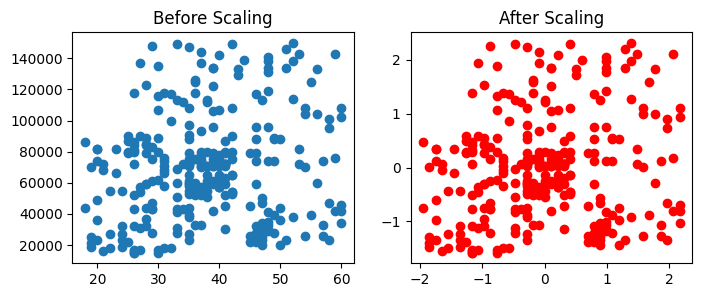

In [132]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

## A kernel density estimate (KDE) plot 

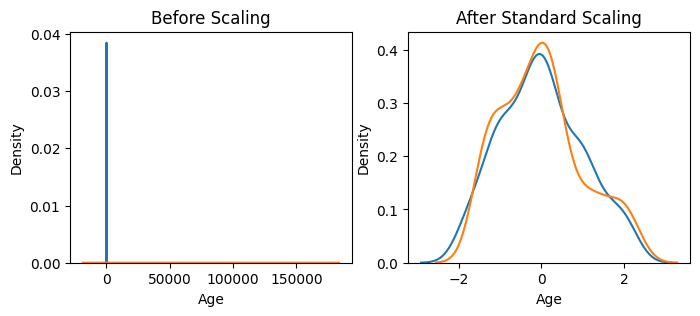

In [133]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of distributions

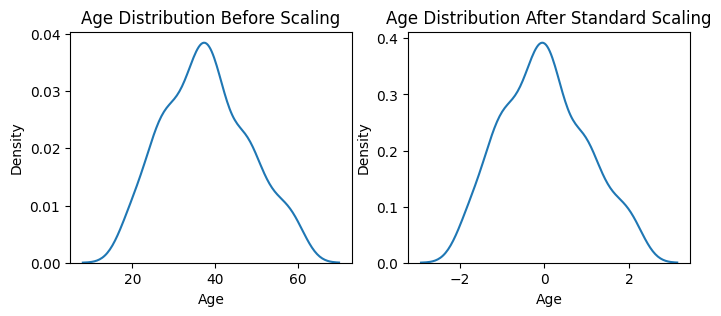

In [134]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

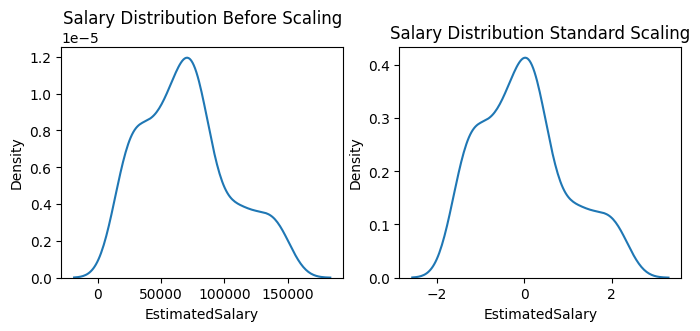

In [135]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [138]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [139]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [140]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [141]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)
DecisionTreeClassifier()
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [142]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effects of Outlier

#putting outlier to see the difference 

In [143]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


/var/folders/5f/7l5r9pzx0jvc117v368rjbc00000gn/T/ipykernel_14505/1232054125.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [144]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


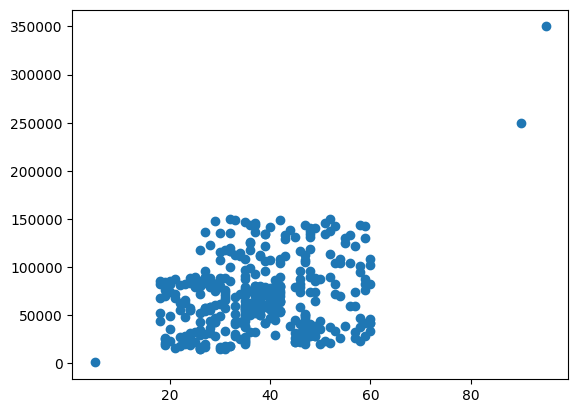

In [145]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

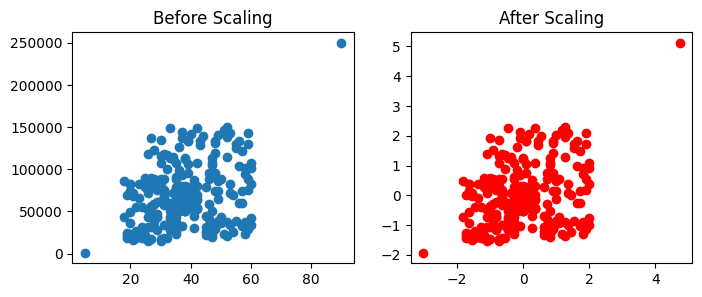

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()